<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第4课 使用Python做数据分析-作业II </h1>

### 欢迎!

在该笔记本的最后，你将会学习到数据清洗的一些基础知识。

## 数据清洗的目的是什么？

数据清洗是指为了便于后续的分析和统计，将原始数据转换成另一种格式的过程。

### 这种柴油机动车的燃料消耗是多少(l/100k)？

### 导入数据 data

In [2]:
import pandas as pd

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

#linux df = pd.read_csv('/resources/data/fuelconsumption.data', names = headers)
df = pd.read_csv('fuelconsumption.data', names = headers)

In [3]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


你会发现，在数据帧上出现了一些问题，那就是有些值是缺失的，这对后续分析不利。 所以，我们如何去识别这些缺失的值然后处理他们呢？


**如何处理空缺数据?**

三个步骤:
1. 识别缺失数据
2. 处理缺失数据
3. 纠正数据格式

<a id="ref1"></a>
# 1. 识别和处理缺失值

<a id="ref2"></a>
在数据集中，缺失数据被标记为"?"

第一步，我们需要把"?"转换成 NaN（NaN全称为Not a Number），这是Python对空值的表达方式。然后我们将使用函数.replace(A, B, inplace = True)来完成这个功能，即把A替换成B

In [4]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 判断空值

现在所有缺失数据都转成了Python默认的空值，我们可以使用内置函数来判断这些数据是否为空值。这里有两个相关函数：
1.  <pre>.isnull()</pre>
2.  <pre>.notnull()</pre>

函数输出为布尔值，表示参数值是否为空值。


In [5]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" 代表空值， "False" 代表非空值.

### 对每一列的空值进行计数
使用循环，我们能很快得到每一列有几个空值（之前提到的，"True" 代表空值， "False" 代表非空值）

In [6]:
for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print ("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

根据上述总结，每一列有205行数据，然后一共有7列含有空值：

1. "normalized-losses": 41个空值
2. "num-of-doors": 2 个空值
3. "bore": 4 个空值
4. "stroke" : 4 个空值
5. "horsepower": 2 个空值
6. "peak-rpm": 2 个空值
7. "price": 4 个空值

<a id="ref3"></a>
## 处理空值

通常处理空值有两个办法：
    1. 丢弃数据
        a. 丢弃整行
        b. 丢弃整列
    2. 替换数据
        a. 用平均值替换
        b. 根据频率替换
        c. 根据其他函数替换

只有当某一列绝大部分数据是空值的时候，丢弃整个这一列才是可行的。在我们的数据集中，这种情况并不满足。

然而我们在选择替换方法的时候有很多的选择，有些方法看起来是合理的。我们将对不同的列尝试使用不同的替换方法。

**用平均值替换:**

    "normalized-losses"
    "stroke"
    "bore"
    "horsepower"
    "peak-rpm"
    
**根据频率替换**

    "num-of-doors": 2 missing data, 值将替换成4
        * 理由: 84%的sedans有4个门. 所以4门是最常见的，用4进行替换比较合理。

**丢弃一整行**

    "price": 4 个空值, 简单删除这四行
        * 理由: price是我们需要预测的，即后续分析必须要有基于price，没有price的数据对我们来说毫无意义

In [7]:
# calculate the mean value for "normalized-losses" column
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)

# replace NaN by mean value in "normalized-losses" column
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)

In [8]:
#calculate the mean value for 'bore' column
avg_2=df['bore'].astype("float").mean(axis=0)

#replace NaN by mean value
df['bore'].replace(np.nan, avg_2, inplace= True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 任务 #1: </h1>

<b>根据上述样例，对"stroke"列用平均值替换NaN</b>
</div>

In [9]:
# calculate the mean vaule for "stroke" column
# YOUR CODE HERE : avg_3 = ...
avg_3=df['stroke'].astype("float").mean(axis=0)

# replace NaN by mean value in "stroke" column
# YOUR CODE HERE
df['stroke'].replace(np.nan, avg_3, inplace= True)

In [37]:
#calculate the mean value for 'horsepower' column
avg_4=df['horsepower'].astype('float').mean(axis=0)

#replace NaN by mean value
df['horsepower'].replace(np.nan, avg_4, inplace= True)

In [11]:
#calculate the mean value for 'peak-rpm' column
avg_5=df['peak-rpm'].astype('float').mean(axis=0)

#replace NaN by mean value
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

检查现在某一个特定列的值是如何分布的，我们可以使用value_counts方法。

In [12]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

我们发现4门是最常见的类型，但是我们同样可以使用idxmax方法帮我们找出出现次数最多的门数。

In [13]:
df['num-of-doors'].value_counts().idxmax()

'four'

替换方法跟我们之前做的十分类似

In [14]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

最后，让我们删除所有不含有price的行

In [15]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [16]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


现在我们已经得到了一份没有空值的数据了。

<a id="ref4"></a>
## 纠正数据格式

在处理了空值之后，最后一步是检查所有数据是否格式正确。

在pandas库中，我们使用
<div>.dtypes()  检查数据类型</div>
<div>.astype() 修改数据类型</div>

In [30]:
# list the data types for each column
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-L/100km         float64
highway-L/100km      float64
price                float64
dtype: object

如上所示，有一些列的格式并不正确。 数值变量的类型应该是float（浮点数）或者int（整数），字符串变量的类型应该是object。 比如说，'bore'和‘stroke’理应当是数值类型，结果却显示object。我们必须要把每一列的数据转换成正确的格式。

In [38]:
# convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")


df[["horsepower"]] = df[["horsepower"]].astype("float")

In [39]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-L/100km         float64
highway-L/100km      float64
price                float64
dtype: object

现在，我们终于得到了清洗过的数据集：没有空值 且 格式正确。

<div>清洗过的数据集将用于后续的分析。</div>

<a id="ref5"></a>
# 数据标准化
数据有可能是来自于格式不同的站点。
**什么是数据标准化?**
<div> 标准化是一个把格式不统一的数据统一成一个公共的格式，以方便用户做对比。
</div>

**例子**
<div>把单位从mpg(每加仑行驶的英里数)转换成L/100km</div>
<div>
在我们的数据集中，列“city-mpg”和“highway-mpg”是由mpg单位表示的，假设我们要开发一个应用，其单位是L/100km，那就需要先进行一次转换。
</div>

转换公式是
L/100km = 235 / mpg
<div>我们可以在pandas中直接使用数值运算</div>

In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [21]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["city-mpg"] = 235/df["city-mpg"]

# rename column name from "city-mpg" to "city-L/100km"
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,22,17450.0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 任务 #2: </h1>

<b>根据上面的例子，将"highway-mpg"列中的mpg转换为L/100km，并将列名修改为"highway-L/100km".</b>
</div>

In [40]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
# YOUR CODE HERE
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
# YOUR CODE HERE
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)


# check your transformed data 
# YOUR CODE HERE
df.head()

KeyError: 'highway-mpg'

<a id="ref6"></a>
# 数据归一化 

**为什么要归一化?**
<div> 归一化是将不同值域的值转换成相同值域的过程。典型的归一化示例就是把数据平均值归一化成1，或者把变量值域映射到0到1的范围内
</div>

**例子**<br>
**目标:** 归一化变量，把值域变成[0,1]<br>
**方式:** 使用公式（原始值/最大值）进行替换<br>

In [23]:
# replace (origianl value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 任务 #3: </h1>

<b>根据上述例子, 对列height进行归一化</b>
</div>

In [24]:
#change the code below to normalize the column'height' by dividing by the max value
#hint: the maximum of a column can be find by df['column_name'].max(). 
# YOUR CODE HERE

df['height'] = df['height']/df['height'].max()


In [25]:
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027



现在我们可以看到，列"length", "width" 和 "height"已经归一化到值域[0,1]

<a id="ref7"></a>
#  装箱
**为什么要装箱?:** 
<div>装箱是一个把连续的数值变成离散的数值（分组）的过程。 </div>

**样例:** 
<div> 在我们的数据集中，"horsepower"（大马力）是一个数值变量，范围是48到288，共57个值。如果我们的分析只关心大马力、中马力、小马力三种类型。那么我们就需要通过装箱根据数值分成三类。

## 使用pandas装箱的例子

In [59]:


# We would like 3 bins of equal size binwidth
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/3
print(type(binwidth))
# build bin array, from min value to max value, with binwidth calculated above
# 'bins' will be values used to determine when one bin ends and another begins
bins = [min(df["horsepower"]),min(df["horsepower"])+binwidth,min(df["horsepower"])+2*binwidth,max(df["horsepower"])]

# set group names
# the cut function uses these as the labels for each 'bin'
group_names = ['Low', 'Medium', 'High']

# add a new column that show the binned horsepower
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names)
df.head(5)

<class 'float'>


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low


我们成功将57个值压缩成了三个。

## 装箱可视化
正常情况下，一个直方图可以用于可视化我们之前创建的箱子。

Text(0.5, 1.0, 'horsepower bins')

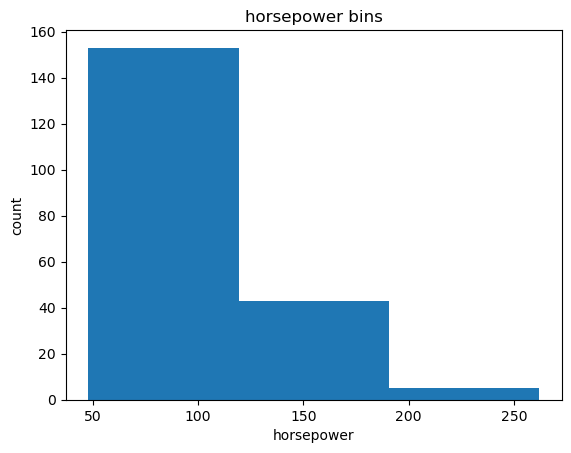

In [60]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

上述绘图展示了horsepower的装箱结果。

<a id="ref8"></a>
# 指示器变量indicator variable (虚拟变量 dummy variable)
**什么是指示器变量?**
<div>是表示某个分类的标签，其数字本身没有内在含义</div>

**为什么使用指数器变量？**
<div>可以在后续的模型里做回归分析</div>

**举例**
<div>我们发现列‘fuel-type’有两个不同的取值，“gas”和“diesel”。但是回归分析不能理解文字，只能理解数字。为了在回归分析中使用这个属性，我们把这一列的值变成了指示器变量  </div>

<div> 我们将使用pandas的get_dummies方法将数值赋值到列fuel type的不同分类上。
<div>

In [61]:
# get indicator variables and assign it to data frame "dummy_variable_1"
dummy_variable_1 = pd.get_dummies(df["fuel-type"])

# change column names for clarity
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


经过上述过程后，我们在"fuel-type"中用0表示gas，用1表示diesel。现在我们再把这个映射关系插入到原始数据集中去。

In [62]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [63]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1


最后两列现在已经是指示变量的表示方式了，都是0或者1。

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 任务 #4: </h1>

<b> 根据上述样例，创建列aspiration的指示器变量。也就是"std" 变成 0, 而 "turbo" 变成 1.</b>
</div>

In [66]:
#change '?' below to the relevant variable name to complete this section

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df["aspiration"])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [68]:
# merge data frame "df" and "dummy_variable_2" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop("aspiration", axis = 1, inplace=True)

### 很好! 你现在完成了数据清洗的笔记。


#### 希望你能在这个主题中体会到乐趣，并继续深入地进行探索学习。  

In [69]:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,11.190476,8.703704,13495.0,Low,0,1,1,0,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,11.190476,8.703704,16500.0,Low,0,1,1,0,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,12.368421,9.038462,16500.0,Medium,0,1,1,0,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,9.791667,7.833333,13950.0,Low,0,1,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,13.055556,10.681818,17450.0,Low,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,10.217391,8.392857,16845.0,Low,0,1,1,0,1,0
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,12.368421,9.400000,19045.0,Medium,0,1,0,1,0,1
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,13.055556,10.217391,21485.0,Medium,0,1,1,0,1,0
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,9.038462,8.703704,22470.0,Low,1,0,0,1,0,1
